In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from geneticalgorithm import geneticalgorithm as ga

# Load Pima dataset
df = pd.read_csv("C:/Users/Admin/OneDrive - mmu.edu.my/DegreeY3S1/Computer Intelligence/preprocessed_data.csv")  # Ensure you have the correct dataset path
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest without Genetic Algorithm:
Train Accuracy: 1.0
Test Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



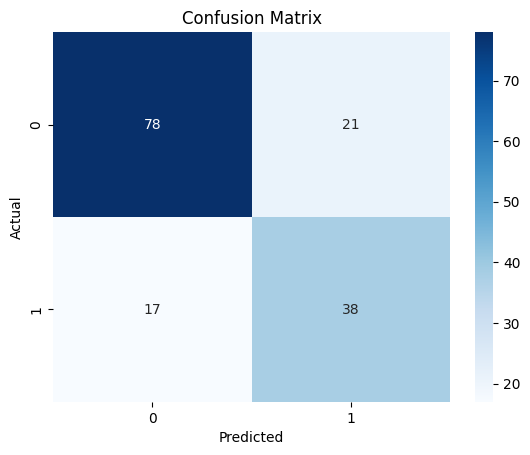

In [2]:
# Function to train and evaluate model
def train_evaluate_rf(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    return rf

# Train Random Forest without GA
print("Random Forest without Genetic Algorithm:")
rf_model = train_evaluate_rf(X_train, X_test, y_train, y_test)

Running Genetic Algorithm for Feature Selection...
 The best solution found:                                                                           
 [1. 1. 1. 0. 0. 1. 0. 1.]

 Objective function:
 0.2142857142857143


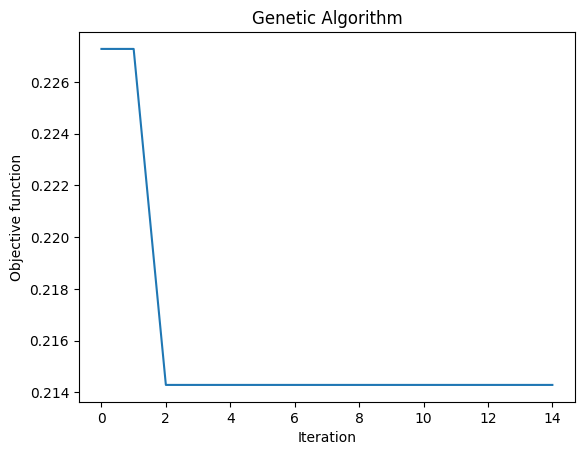


Train Accuracy: 1.0
Test Accuracy: 0.7857142857142857
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83        99
           1       0.70      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.78      0.79      0.79       154



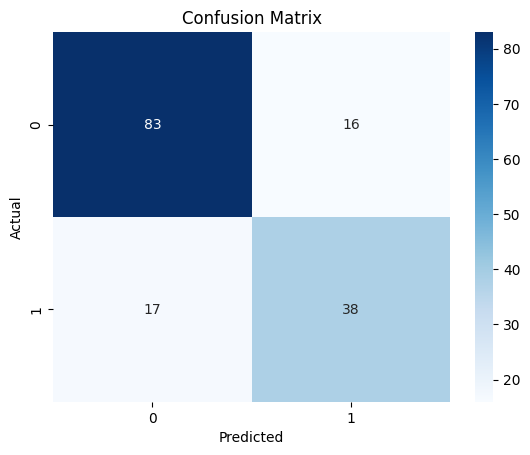

In [3]:
# Genetic Algorithm for Feature Selection
def fitness_function(solution):
    selected_features = [bool(x) for x in solution]
    if sum(selected_features) == 0:
        return 1  # Avoid empty feature selection
    X_selected = X.iloc[:, selected_features]
    X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_ga, y_train_ga)
    y_pred = model.predict(X_test_ga)
    return 1 - accuracy_score(y_test_ga, y_pred)

varbound = np.array([[0, 1]] * X.shape[1])
algorithm_param = {'max_num_iteration': 100, 'population_size': 50, 'mutation_probability': 0.1,
                   'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': 10}

model_ga = ga(function=fitness_function, dimension=X.shape[1], variable_type='int', variable_boundaries=varbound,
              algorithm_parameters=algorithm_param)
print("Running Genetic Algorithm for Feature Selection...")
model_ga.run()
best_solution = model_ga.output_dict['variable']
selected_features = [bool(x) for x in best_solution]
X_selected = X.iloc[:, selected_features]
X_train_ga, X_test_ga, y_train_ga, y_test_ga = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train Random Forest with selected features
print("Random Forest with Genetic Algorithm-selected Features:")
rf_model_ga = train_evaluate_rf(X_train_ga, X_test_ga, y_train_ga, y_test_ga)